In [2]:
import bagpy
from bagpy import bagreader

b = bagreader("preset2_9.2deg.bag")

# get the list of topics
print(b.topic_table)

[INFO]  Data folder preset2_9.2deg already exists. Not creating.
                          Topics                            Types  \
0                   /diagnostics  diagnostic_msgs/DiagnosticArray   
1           /foot2/device/status                 mscl_msgs/Status   
2                /foot2/imu/data                  sensor_msgs/Imu   
3                     /foot2/mag        sensor_msgs/MagneticField   
4   /foot2/nav/filtered_imu/data                  sensor_msgs/Imu   
5             /foot2/nav/heading          mscl_msgs/FilterHeading   
6       /foot2/nav/heading_state     mscl_msgs/FilterHeadingState   
7                /foot2/nav/odom                nav_msgs/Odometry   
8              /foot2/nav/status           mscl_msgs/FilterStatus   
9                        /rosout                rosgraph_msgs/Log   
10                           /tf               tf2_msgs/TFMessage   
11         /ti_mmwave/radar_scan       ti_mmwave_rospkg/RadarScan   
12     /ti_mmwave/radar_scan_pcl      

In [4]:
import pandas as pd

# Replace with your topic of interest
topic = '/foot2/imu/data'
csv_path = b.message_by_topic(topic)
radar_data = pd.read_csv(csv_path)
print(radar_data)


              Time  header.seq  header.stamp.secs  header.stamp.nsecs  \
0     1.700026e+09       26507         1700026234           510710272   
1     1.700026e+09       26508         1700026234           520726528   
2     1.700026e+09       26509         1700026234           530742528   
3     1.700026e+09       26510         1700026234           540766464   
4     1.700026e+09       26511         1700026234           550781440   
...            ...         ...                ...                 ...   
5107  1.700026e+09       31614         1700026285           818250752   
5108  1.700026e+09       31615         1700026285           828261888   
5109  1.700026e+09       31616         1700026285           838274560   
5110  1.700026e+09       31617         1700026285           848290560   
5111  1.700026e+09       31618         1700026285           858300928   

     header.frame_id  orientation.x  orientation.y  orientation.z  \
0           gx5_link       0.679471       0.109158    

In [5]:
# Replace with your topic of interest
topic = '/ti_mmwave/radar_scan'
csv_path = b.message_by_topic(topic)
radar_data = pd.read_csv(csv_path)
print(radar_data)


               Time  header.seq  header.stamp.secs  header.stamp.nsecs  \
0      1.700026e+09      269045         1700026234           761811310   
1      1.700026e+09      269046         1700026234           761954848   
2      1.700026e+09      269047         1700026234           761994326   
3      1.700026e+09      269048         1700026234           762172082   
4      1.700026e+09      269049         1700026234           762208487   
...             ...         ...                ...                 ...   
54754  1.700026e+09      323799         1700026285           836386663   
54755  1.700026e+09      323800         1700026285           836400048   
54756  1.700026e+09      323801         1700026285           836413225   
54757  1.700026e+09      323802         1700026285           836425881   
54758  1.700026e+09      323803         1700026285           836438849   

      header.frame_id  point_id          x          y    z      range  \
0           ti_mmwave         0   0.02

In [48]:
# Replace with your topic of interest
topic = '/ti_mmwave/radar_scan' 
csv_path = b.message_by_topic(topic)
radar_data = pd.read_csv(csv_path)

# Print the first few rows of the DataFrame to get an overview
print(radar_data.head(10))  # Adjust the number to display more or fewer rows

# Print more rows from a specific section if needed
# For example, to print rows 54750 to 54758 (the last few rows of your dataset)
print(radar_data.iloc[-40:])


           Time  header.seq  header.stamp.secs  header.stamp.nsecs  \
0  1.700026e+09      269045         1700026234           761811310   
1  1.700026e+09      269046         1700026234           761954848   
2  1.700026e+09      269047         1700026234           761994326   
3  1.700026e+09      269048         1700026234           762172082   
4  1.700026e+09      269049         1700026234           762208487   
5  1.700026e+09      269050         1700026234           762243434   
6  1.700026e+09      269051         1700026234           762275412   
7  1.700026e+09      269052         1700026234           762307755   
8  1.700026e+09      269053         1700026234           762339369   
9  1.700026e+09      269054         1700026234           762371087   

  header.frame_id  point_id         x         y    z     range  velocity  \
0       ti_mmwave         0  0.021484  0.083984  0.0  0.087144       0.0   
1       ti_mmwave         1  0.527344 -0.458984  0.0  0.697151       0.0   
2

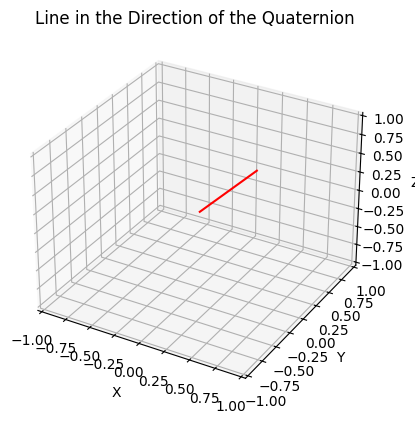

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import quaternion  # This imports numpy-quaternion

# Define the quaternion (w, x, y, z) at a specific timestamp
# Replace these values with the quaternion from your data
q = quaternion.quaternion(0.708136, 0.109158, 0.157947, 0.679471)  # Note the order change
q = q.normalized()

# Define a reference point (e.g., the origin) and a 'forward' direction
reference_point = np.array([0, 0, 0])
forward_vector = np.array([1, 0, 0])  # This represents the direction in which you're looking

# Convert the forward vector to a quaternion
q_forward = quaternion.quaternion(0, *forward_vector)

# Rotate the forward vector
q_rotated = q * q_forward * q.conjugate()

# Extract the rotated vector and calculate the endpoint for the line
rotated_vector = np.array([q_rotated.x, q_rotated.y, q_rotated.z])
end_point = reference_point + rotated_vector

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot a line from the reference point to the end point
ax.plot([reference_point[0], end_point[0]], [reference_point[1], end_point[1]], [reference_point[2], end_point[2]], 'r-')

# Setting plot limits - adjust these as necessary
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Line in the Direction of the Quaternion')

plt.show()


In [6]:
import numpy as np
import quaternion  # This imports numpy-quaternion

def rotate_vector(v, q):
    """
    Rotates a 3D vector by a given quaternion.

    Parameters:
    - v: The 3D vector to be rotated, as a NumPy array (e.g., np.array([x, y, z])).
    - q: The quaternion representing the rotation, as a numpy-quaternion object.

    Returns:
    - The rotated vector as a NumPy array.
    """

    # Convert the vector into a quaternion with a zero real part
    v_q = quaternion.quaternion(0, v[0], v[1], v[2])

    # Rotate the vector using quaternion multiplication
    # The operation is q * v_q * q.conjugate()
    rotated_v_q = q * v_q * q.conjugate()

    # Extract the vector part of the resulting quaternion and return it
    return np.array([rotated_v_q.x, rotated_v_q.y, rotated_v_q.z])


[INFO]  Data folder preset2_9.2deg already exists. Not creating.
[INFO]  Data folder preset2_9.2deg already exists. Not creating.


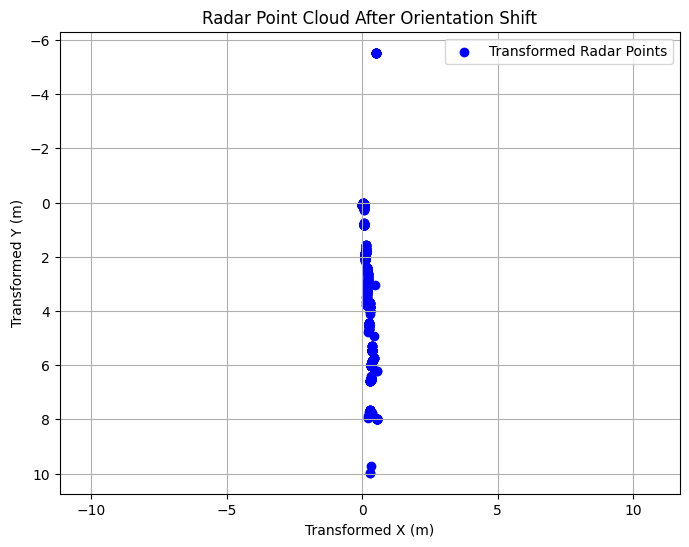

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import quaternion  # This imports numpy-quaternion
import pandas as pd
import bagpy
from bagpy import bagreader

# Load the bag and the topic
b = bagreader("preset2_9.2deg.bag")
topic = '/ti_mmwave/radar_scan'
csv_path = b.message_by_topic(topic)
radar_data = pd.read_csv(csv_path)

# Load the bag and the topic for IMU data
b = bagreader("preset2_9.2deg.bag")
topic = '/foot2/nav/filtered_imu/data'
csv_path = b.message_by_topic(topic)
imu_data = pd.read_csv(csv_path)

specific_secs = 1700026238
tolerance_secs = 1
close_timestamps_quat = imu_data[np.abs(imu_data['header.stamp.secs'] - specific_secs) < tolerance_secs]

row = close_timestamps_quat.iloc[0]
q = quaternion.quaternion(row['orientation.x'], row['orientation.y'], row['orientation.z'], row['orientation.w'])
q = q.normalized()

# Define the sensor's initial axes in 3D space
sensor_x = np.array([0, 0, 1])  # Initially aligned with 3D Y
sensor_y = np.array([0, 1, 0])  # Initially aligned with 3D Z

# Rotate the sensor axes
rotated_sensor_x = rotate_vector(sensor_x, q)
rotated_sensor_y = rotate_vector(sensor_y, q)

# Filter and transform the radar data
specific_secs = 1700026238
tolerance_secs = 1
close_timestamps_radar = radar_data[np.abs(radar_data['header.stamp.secs'] - specific_secs) < tolerance_secs]

if close_timestamps_radar.empty:
    print("No data found close to the specified time. Adjust specific_secs and/or tolerance_secs.")
else:
    # Transform the radar points based on the new sensor orientation
    transformed_points = [rotate_vector(np.array([0, y, x]), q) for x, y in zip(close_timestamps_radar['x'], close_timestamps_radar['y'])]

    # Extracting the transformed x and y coordinates
    transformed_x = [p[1] for p in transformed_points]  # Sensor's X is now aligned with 3D Y
    transformed_y = [p[2] for p in transformed_points]  # Sensor's Y is now aligned with 3D Z

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.scatter(transformed_x, transformed_y, c='b', marker='o', label='Transformed Radar Points')
    plt.xlabel('Transformed X (m)')
    plt.ylabel('Transformed Y (m)')
    plt.title('Radar Point Cloud After Orientation Shift')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.gca().invert_yaxis()
    plt.show()


[INFO]  Data folder preset2_9.2deg already exists. Not creating.
[INFO]  Data folder preset3_10.8deg already exists. Not creating.
[INFO]  Data folder preset4_12.4deg already exists. Not creating.


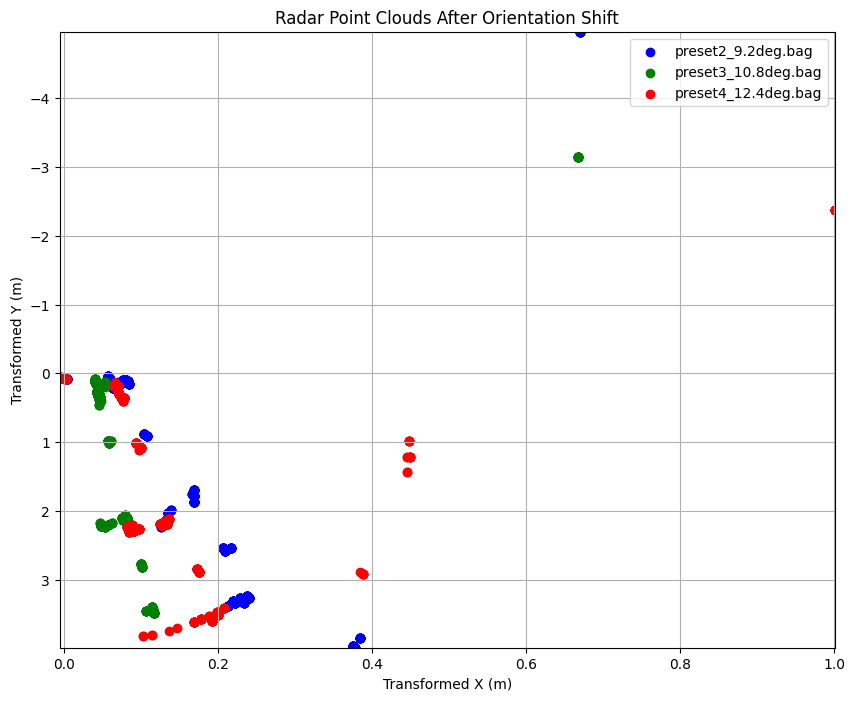

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import quaternion  # This imports numpy-quaternion
import pandas as pd
import bagpy
from bagpy import bagreader

# Function to rotate a vector using a quaternion
def rotate_vector(v, q):
    v_q = quaternion.quaternion(0, v[0], v[1], v[2])
    rotated_v_q = q * v_q * q.conjugate()
    return np.array([rotated_v_q.x, rotated_v_q.y, rotated_v_q.z])

# List of bag files
bag_files = ["preset2_9.2deg.bag", "preset3_10.8deg.bag", "preset4_12.4deg.bag"]

# Define the topics
radar_topic = '/ti_mmwave/radar_scan'
imu_topic = '/foot2/nav/filtered_imu/data'

# Initialize a figure for plotting
plt.figure(figsize=(10, 8))

# Colors for each bag file
colors = ['b', 'g', 'r']

# Initialize variables to track the min and max
min_x, max_x = float('inf'), float('-inf')
min_y, max_y = float('inf'), float('-inf')

for i, bag_file in enumerate(bag_files):
    b = bagreader(bag_file)

    # Load radar and IMU data
    radar_csv_path = b.message_by_topic(radar_topic)
    radar_data = pd.read_csv(radar_csv_path)
    imu_csv_path = b.message_by_topic(imu_topic)
    imu_data = pd.read_csv(imu_csv_path)

    # Determine the range of timestamps and calculate the midpoint
    min_timestamp = imu_data['header.stamp.secs'].min()
    max_timestamp = imu_data['header.stamp.secs'].max()
    midpoint_timestamp = (min_timestamp + max_timestamp) / 2

    # Select the closest timestamp to the midpoint
    closest_to_midpoint = imu_data.iloc[(imu_data['header.stamp.secs'] - midpoint_timestamp).abs().argsort()[:1]]

    row = closest_to_midpoint.iloc[0]
    q = quaternion.quaternion(row['orientation.x'], row['orientation.y'], row['orientation.z'], row['orientation.w'])
    q = q.normalized()

    # Filter radar data for close timestamps
    tolerance_secs = 1  # Define your tolerance
    specific_secs = closest_to_midpoint['header.stamp.secs'].values[0]
    close_timestamps_radar = radar_data[np.abs(radar_data['header.stamp.secs'] - specific_secs) < tolerance_secs]

    if not close_timestamps_radar.empty:
        # Transform the radar points based on the new sensor orientation
        transformed_points = [rotate_vector(np.array([0, y, x]), q) for x, y in zip(close_timestamps_radar['x'], close_timestamps_radar['y'])]

        # Extracting the transformed x and y coordinates
        transformed_x = [p[1] for p in transformed_points]  # Sensor's X is now aligned with 3D Y
        transformed_y = [p[2] for p in transformed_points]  # Sensor's Y is now aligned with 3D Z

        max_distance = 4 # meters
        filtered_x = [x for x, y in zip(transformed_x, transformed_y) if y <= max_distance]
        filtered_y = [y for y in transformed_y if y <= max_distance]

        # Update the min and max values
        min_x, max_x = min(min_x, min(filtered_x)), max(max_x, max(filtered_x))
        min_y, max_y = min(min_y, min(filtered_y)), max(max_y, max(filtered_y))

        # Scatter plot for the transformed radar points
        plt.scatter(filtered_x, filtered_y, c=colors[i], marker='o', label=f'{bag_file}')


# Plot settings
plt.xlabel('Transformed X (m)')
plt.ylabel('Transformed Y (m)')
plt.title('Radar Point Clouds After Orientation Shift')
plt.legend()
plt.grid(True)

# Set the axes limits to the range of the values
plt.xlim([min_x, max_x])
plt.ylim([min_y, max_y])

plt.gca().invert_yaxis()
plt.show()


[INFO]  Data folder preset2_9.2deg already exists. Not creating.


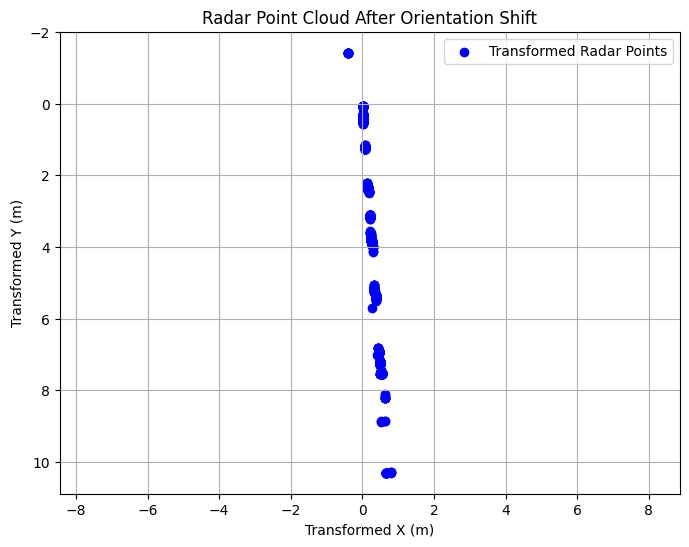

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import quaternion  # This imports numpy-quaternion
import pandas as pd
import bagpy
from bagpy import bagreader

# Load the bag and the topic
b = bagreader("preset2_9.2deg.bag")
topic = '/ti_mmwave/radar_scan'
csv_path = b.message_by_topic(topic)
data = pd.read_csv(csv_path)

# Define the quaternion (w, x, y, z) at a specific timestamp
q = quaternion.quaternion(0.708136, 0.109158, 0.157947, 0.679471)
q = q.normalized()

# Define the sensor's initial axes in 3D space
sensor_x = np.array([0, 0, 1])  # Initially aligned with 3D Y
sensor_y = np.array([0, 1, 0])  # Initially aligned with 3D Z

# Rotate the sensor axes
rotated_sensor_x = rotate_vector(sensor_x, q)
rotated_sensor_y = rotate_vector(sensor_y, q)

# Filter and transform the radar data
specific_secs = 1700026238
tolerance_secs = 1
close_timestamps = data[np.abs(data['header.stamp.secs'] - specific_secs) < tolerance_secs]

if close_timestamps.empty:
    print("No data found close to the specified time. Adjust specific_secs and/or tolerance_secs.")
else:
    # Transform the radar points based on the new sensor orientation
    transformed_points = [rotate_vector(np.array([0, y, x]), q) for x, y in zip(close_timestamps['x'], close_timestamps['y'])]

    # Extracting the transformed x and y coordinates
    transformed_x = [p[1] for p in transformed_points]  # Sensor's X is now aligned with 3D Y
    transformed_y = [p[2] for p in transformed_points]  # Sensor's Y is now aligned with 3D Z

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.scatter(transformed_x, transformed_y, c='b', marker='o', label='Transformed Radar Points')
    plt.xlabel('Transformed X (m)')
    plt.ylabel('Transformed Y (m)')
    plt.title('Radar Point Cloud After Orientation Shift')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.gca().invert_yaxis()
    plt.show()


In [ ]:
# Assuming the topic for quaternion data, replace with the actual topic
quaternion_topic = '/quaternion_topic'  # Replace with the actual topic name
radar_topic = '/ti_mmwave/radar_scan'

# Load radar and quaternion data
radar_csv_path = b.message_by_topic(radar_topic)
quaternion_csv_path = b.message_by_topic(quaternion_topic)

radar_data = pd.read_csv(radar_csv_path)
quaternion_data = pd.read_csv(quaternion_csv_path)

# Define the specific second or range you are interested in
specific_secs = 1700026238
tolerance_secs = 1

# Filter quaternion data for close timestamps based on header.stamp.secs or an equivalent field
close_quaternions = quaternion_data[np.abs(quaternion_data['header.stamp.secs'] - specific_secs) < tolerance_secs]

if close_quaternions.empty:
    print("No quaternion data found close to the specified time. Adjust specific_secs and/or tolerance_secs.")
else:
    # Assuming the quaternion is stored in fields qw, qx, qy, qz
    # Selecting the first close quaternion if multiple are present
    q = quaternion.quaternion(*close_quaternions.iloc[0][['qw', 'qx', 'qy', 'qz']])
    q = q.normalized()


[INFO]  Data folder preset2_9.2deg already exists. Not creating.


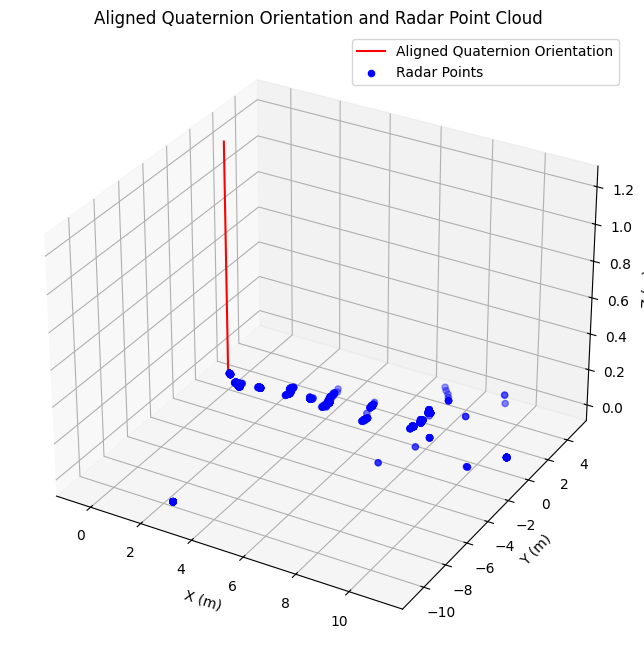

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import quaternion  # This imports numpy-quaternion
import pandas as pd
import bagpy
from bagpy import bagreader

# Load the bag and the topic for radar data
b = bagreader("preset2_9.2deg.bag")
topic = '/ti_mmwave/radar_scan'
csv_path = b.message_by_topic(topic)
radar_data = pd.read_csv(csv_path)

# Define a specific second or range you are interested in for the radar data
specific_secs = 1700026238  # Replace with the second you're interested in
tolerance_secs = 1  # How close the timestamps should be to the specific_secs

# Filter radar data for close timestamps based on header.stamp.secs
close_timestamps_radar = radar_data[np.abs(radar_data['header.stamp.secs'] - specific_secs) < tolerance_secs]

# Define the quaternion (w, x, y, z) at a specific timestamp
# Replace these values with the quaternion from your data
q = quaternion.quaternion(0.708136, 0.109158, 0.157947, 0.679471)
q = q.normalized()

# Define the offset quaternion (example values here, replace with your actual offset)
# This represents the known rotation needed to align the IMU with the radar
roll_offset, pitch_offset, yaw_offset = 0, 0, 0  # Replace with your actual offsets
q_offset = quaternion.from_euler_angles(roll_offset, pitch_offset, yaw_offset)

# Rotate the original quaternion by the offset to align it with the radar
q_aligned = q_offset * q

# Define a reference point (e.g., the origin) and a 'forward' direction
reference_point = np.array([0, 0, 0])
forward_vector = np.array([1, 1, 1])  # This represents the direction in which you're looking

# Convert the forward vector to a quaternion
q_forward = quaternion.quaternion(0, *forward_vector)

# Rotate the forward vector
q_rotated = q_aligned * q_forward * q_aligned.conjugate()

# Extract the rotated vector and calculate the endpoint for the line
rotated_vector = np.array([q_rotated.x, q_rotated.y, q_rotated.z])
end_point = reference_point + rotated_vector

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot a line from the reference point to the end point (Quaternion Orientation)
ax.plot([reference_point[0], end_point[0]], [reference_point[1], end_point[1]], [reference_point[2], end_point[2]], 'r-', label='Aligned Quaternion Orientation')

if not close_timestamps_radar.empty:
    # Plot the radar points with close timestamps
    ax.scatter(close_timestamps_radar['x'], close_timestamps_radar['y'], close_timestamps_radar['z'], c='b', marker='o', label='Radar Points')
else:
    print("No radar data found close to the specified time. Adjust specific_secs and/or tolerance_secs.")

# Setting plot limits and labels
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.legend()
plt.title('Aligned Quaternion Orientation and Radar Point Cloud')

plt.show()


[INFO]  Data folder preset2_9.2deg already exists. Not creating.


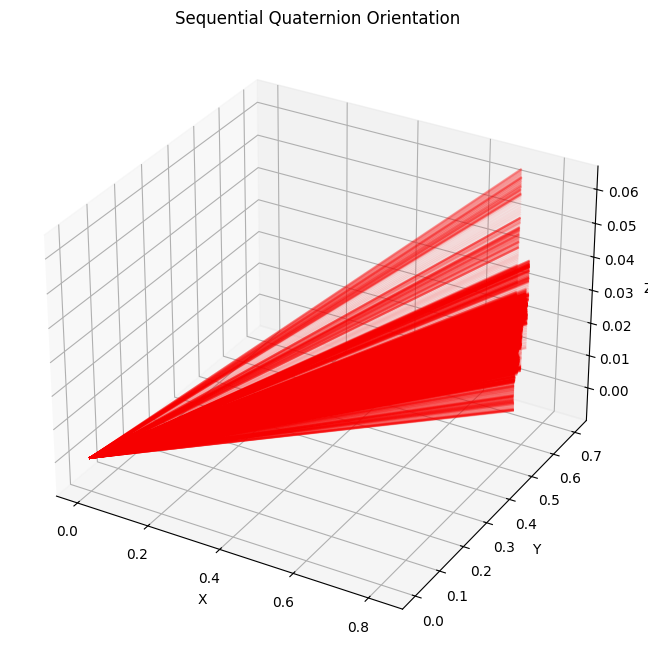

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import quaternion  # This imports numpy-quaternion
import pandas as pd
import bagpy
from bagpy import bagreader

# Load the bag and the topic for IMU data
b = bagreader("preset2_9.2deg.bag")
topic = '/foot2/nav/filtered_imu/data'
csv_path = b.message_by_topic(topic)
imu_data = pd.read_csv(csv_path)

# Define a 'forward' direction
forward_vector = np.array([1, 0, 0])  # Represents the direction in which you're looking

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Iterate through each orientation point
for index, row in imu_data.iterrows():
    # Define the quaternion (w, x, y, z) at the specific timestamp
    q = quaternion.quaternion(row['orientation.w'], row['orientation.x'], row['orientation.y'], row['orientation.z'])
    q = q.normalized()

    # Convert the forward vector to a quaternion
    q_forward = quaternion.quaternion(0, *forward_vector)

    # Rotate the forward vector
    q_rotated = q * q_forward * q.conjugate()

    # Extract the rotated vector and calculate the endpoint for the line
    rotated_vector = np.array([q_rotated.x, q_rotated.y, q_rotated.z])
    reference_point = np.array([0, 0, 0])  # Assuming the origin as the reference
    end_point = reference_point + rotated_vector

    # Plot a line from the reference point to the end point (Quaternion Orientation)
    ax.plot([reference_point[0], end_point[0]], [reference_point[1], end_point[1]], [reference_point[2], end_point[2]], 'r-', alpha=0.1)

# Setting plot limits and labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Sequential Quaternion Orientation')

plt.show()


In [2]:
import numpy as np

v = [1, 1, 1, 1]

def hadamard_multiply(v, level):
    n = len(v)
    
    # Base case
    if n == 1:
        return v

    # Split the vector v into two halves
    v1 = v[:n // 2]
    v2 = v[n // 2:]

    # Recursively calculate Hadamard multiplication on each half
    top_half = np.array(hadamard_multiply(v1, level - 1)) + np.array(hadamard_multiply(v2, level - 1))
    bottom_half = np.array(hadamard_multiply(v1, level - 1)) - np.array(hadamard_multiply(v2, level - 1))

    # Combine the results
    return np.concatenate([top_half, bottom_half])

# Example usage
n = 4  # n should be a power of 2
input_vector = v  # Example vector of length n
result = hadamard_multiply(input_vector, int(np.log2(n)))

print("Input Vector:", input_vector)
print("Result:", result)


Input Vector: [1, 1, 1, 1]
Result: [4 0 0 0]
